In [ ]:
# installing necessary packages
!pip install catboost -q
!pip install tensorflow -q

In [49]:
# importing necessary files
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, LeakyReLU, Embedding, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings("ignore")
print('Success')

Success


In [50]:
# 5 sample data (random rows)
data = pd.read_csv('survey lung cancer.csv')
data.sample(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
46,M,62,2,2,1,1,2,1,2,1,1,2,2,2,2,YES
234,M,77,1,2,1,2,1,2,2,2,2,2,1,1,1,YES
26,F,61,2,2,2,1,1,2,2,1,2,1,2,2,2,YES
134,M,71,2,2,2,1,2,1,2,2,2,2,1,2,2,YES
27,M,69,1,1,1,2,1,2,1,2,1,2,2,1,2,NO


In [51]:
# top 5 rows
data.head(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [52]:
# bottom 5 rows
data.tail(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


In [53]:
# shape of dataset
data.shape

(309, 16)

In [54]:
# info of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [55]:
# check null values in dataset
data.isnull().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


In [56]:
# overall statistics about dataset
data.describe(include = 'all')

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,309,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES
freq,162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270
mean,NaN,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634,NaN
std,NaN,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588,NaN
min,NaN,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,NaN,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
50%,NaN,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,NaN
75%,NaN,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN


In [57]:
# columns
columns = data.columns.tolist()
columns

['GENDER',
 'AGE',
 'SMOKING',
 'YELLOW_FINGERS',
 'ANXIETY',
 'PEER_PRESSURE',
 'CHRONIC DISEASE',
 'FATIGUE ',
 'ALLERGY ',
 'WHEEZING',
 'ALCOHOL CONSUMING',
 'COUGHING',
 'SHORTNESS OF BREATH',
 'SWALLOWING DIFFICULTY',
 'CHEST PAIN',
 'LUNG_CANCER']

In [58]:
# check repeated rows
data.duplicated().sum()

33

In [59]:
# remove repeated rows
data.drop_duplicates(inplace = True)
data.duplicated().sum()

0

In [60]:
# encoding the categorical features
data['GENDER'] = data['GENDER'].replace(['M', 'F'], [0, 1])
data['LUNG_CANCER'] = data['LUNG_CANCER'].replace(['YES', 'NO'], [1, 0])
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,1,59,1,2,2,2,1,1,2,2,1,2,1,2,1,1
280,1,59,2,1,1,1,2,2,2,1,1,1,2,1,1,0
281,0,55,2,1,1,1,1,2,2,1,1,1,2,1,2,0
282,0,46,1,2,2,1,1,1,1,1,1,1,1,2,2,0


In [61]:
# show value counts for each coluumn
columnsNew = list(columns)
columnsNew.remove('AGE')
for col in columns:
    d_type = data[col].dtype
    counts = data[col].value_counts()
    print(f"Counts for {col}:")
    print(counts)
    print("============================================================")

Counts for GENDER:
GENDER
0    142
1    134
Name: count, dtype: int64
Counts for AGE:
AGE
64    18
60    16
56    16
62    16
59    15
63    15
70    14
61    14
67    11
69    10
55    10
72    10
68     9
71     9
57     9
77     9
58     8
54     7
74     6
65     5
51     5
75     5
73     4
52     4
53     4
66     4
76     3
47     3
49     3
48     2
44     2
78     2
81     2
21     1
79     1
38     1
39     1
87     1
46     1
Name: count, dtype: int64
Counts for SMOKING:
SMOKING
2    150
1    126
Name: count, dtype: int64
Counts for YELLOW_FINGERS:
YELLOW_FINGERS
2    159
1    117
Name: count, dtype: int64
Counts for ANXIETY:
ANXIETY
1    139
2    137
Name: count, dtype: int64
Counts for PEER_PRESSURE:
PEER_PRESSURE
2    140
1    136
Name: count, dtype: int64
Counts for CHRONIC DISEASE:
CHRONIC DISEASE
2    144
1    132
Name: count, dtype: int64
Counts for FATIGUE :
FATIGUE 
2    183
1     93
Name: count, dtype: int64
Counts for ALLERGY :
ALLERGY 
2    151
1    125
Name: cou

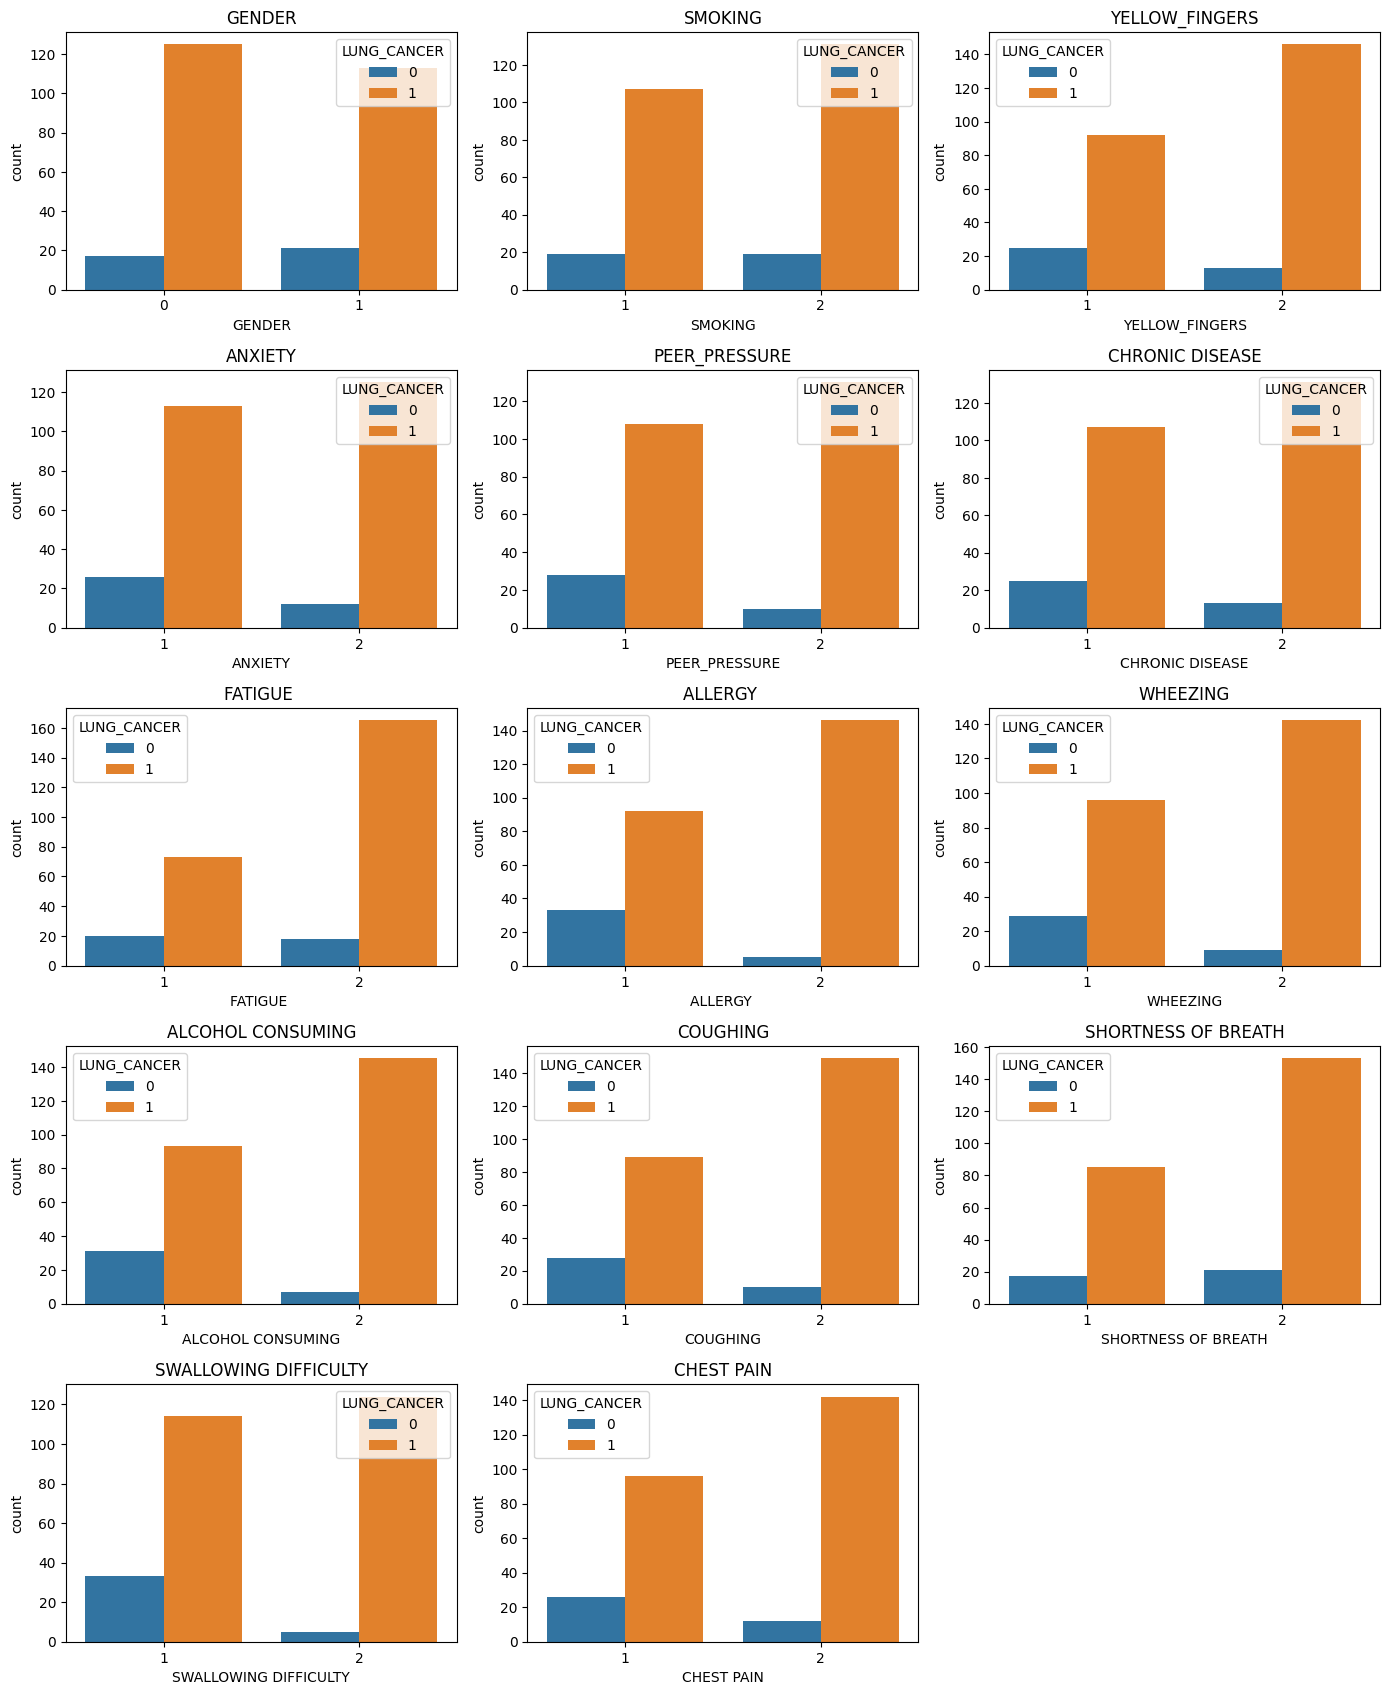

In [62]:
# data Visualization
fig = plt.figure(figsize = (14, 20))
for i in range (len(columnsNew)-1):
    plt.subplot(6, 3, i+1)
    plt.title(columnsNew[i])
    sns.countplot(x = data[columnsNew[i]], data = data, hue = 'LUNG_CANCER')
plt.tight_layout()

<Axes: title={'center': 'AGE'}, xlabel='AGE', ylabel='count'>

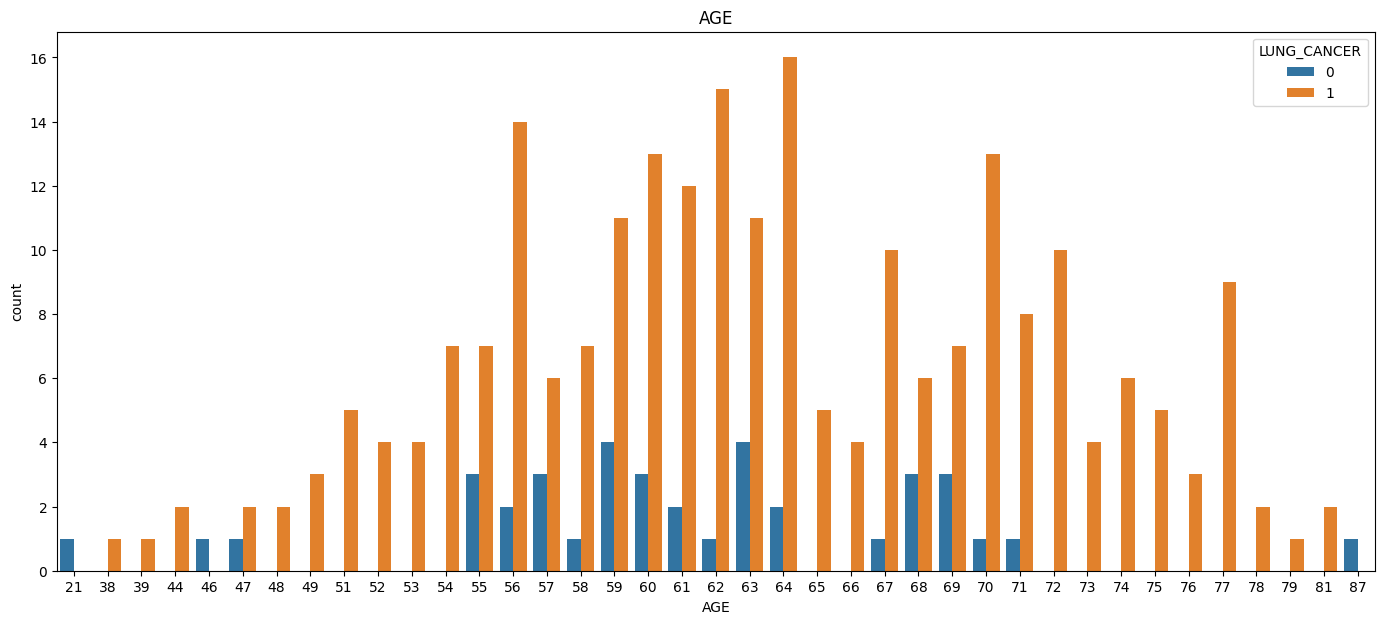

In [63]:
fig = plt.figure(figsize = (17, 7))
plt.title('AGE')
sns.countplot(x = data['AGE'], data = data, hue = 'LUNG_CANCER')

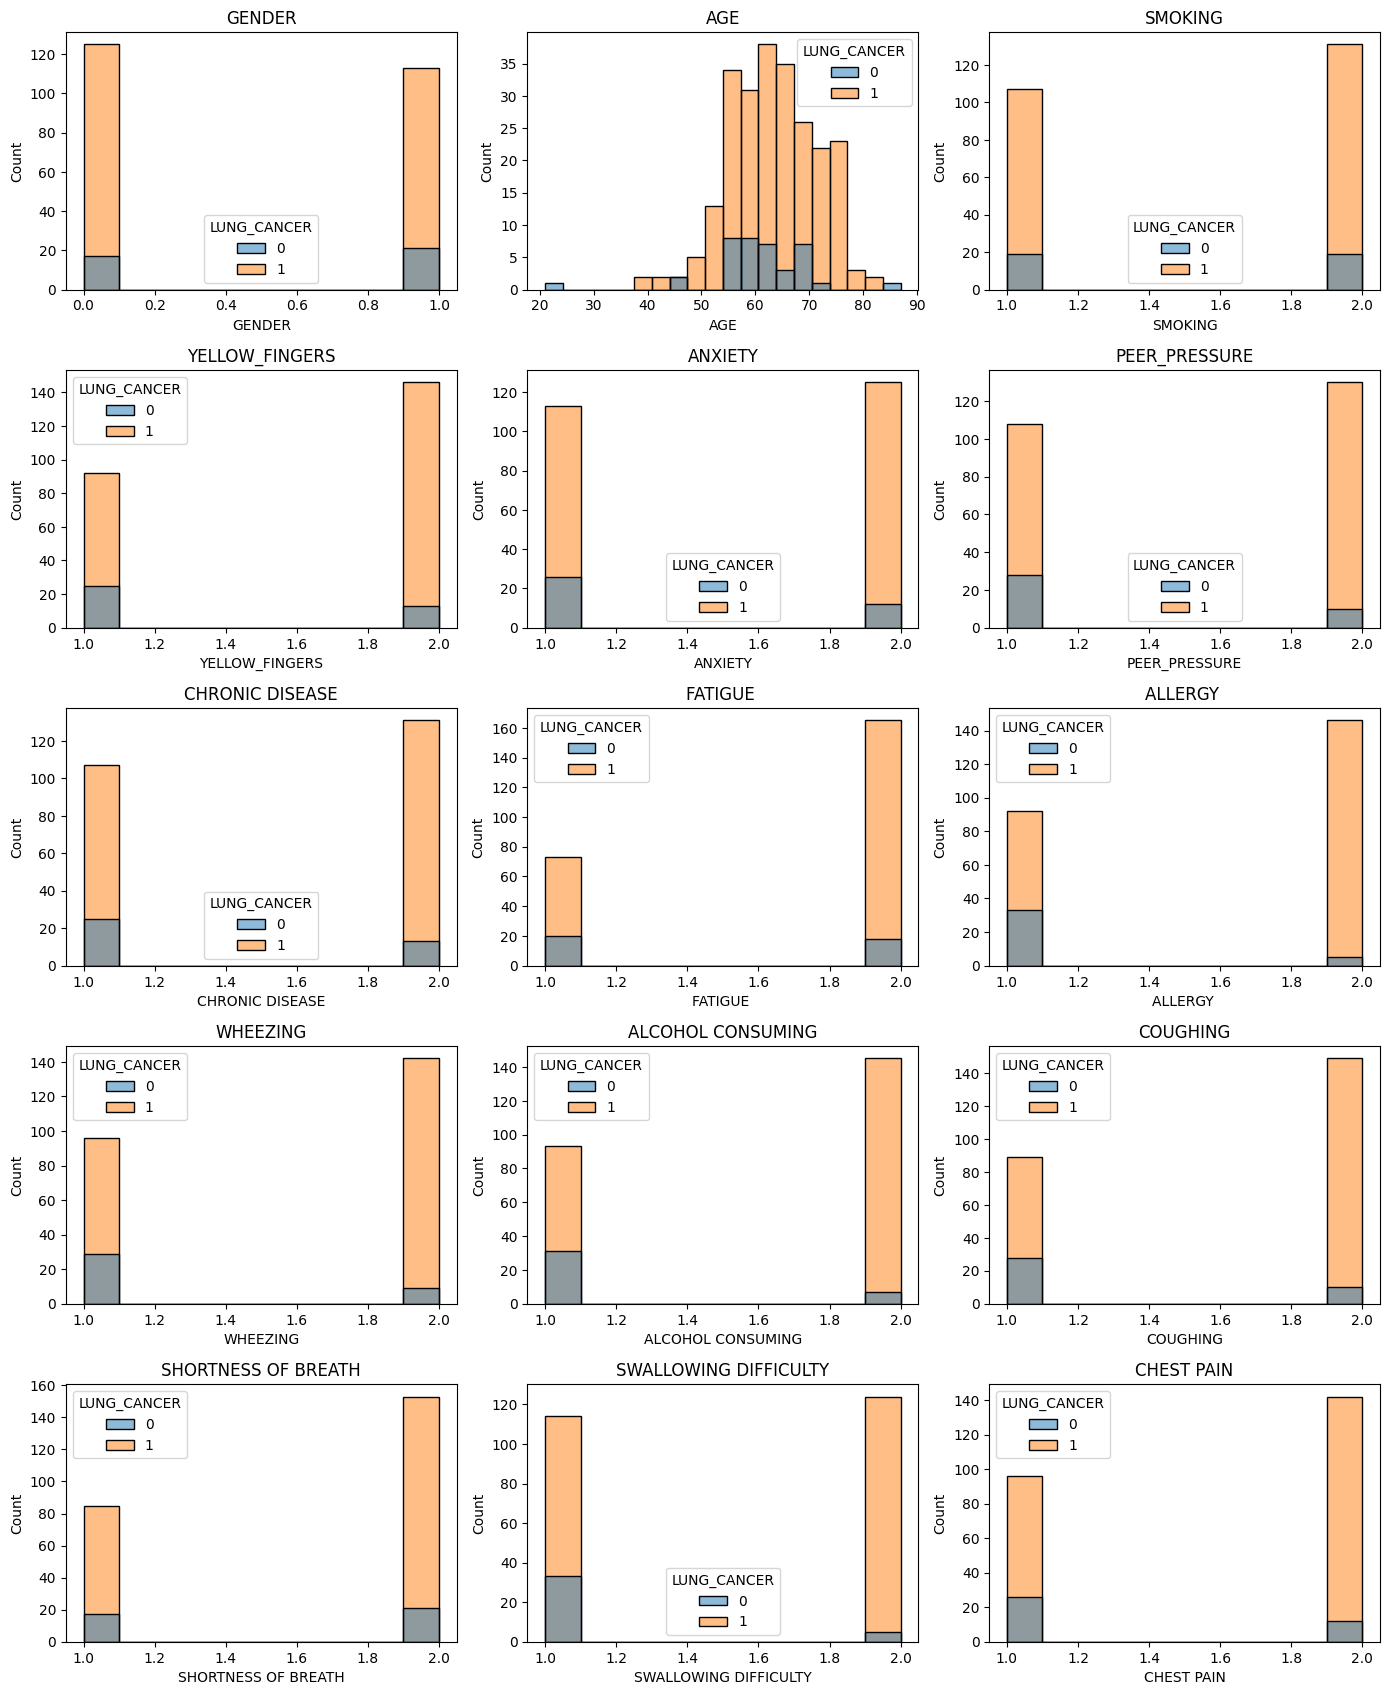

In [64]:
fig = plt.figure(figsize = (14, 20))
for i in range(len(columns)-1):
    plt.subplot(6, 3, i+1)
    plt.title(columns[i])
    sns.histplot(data = data, x = data[columns[i]], hue = 'LUNG_CANCER')
plt.tight_layout()

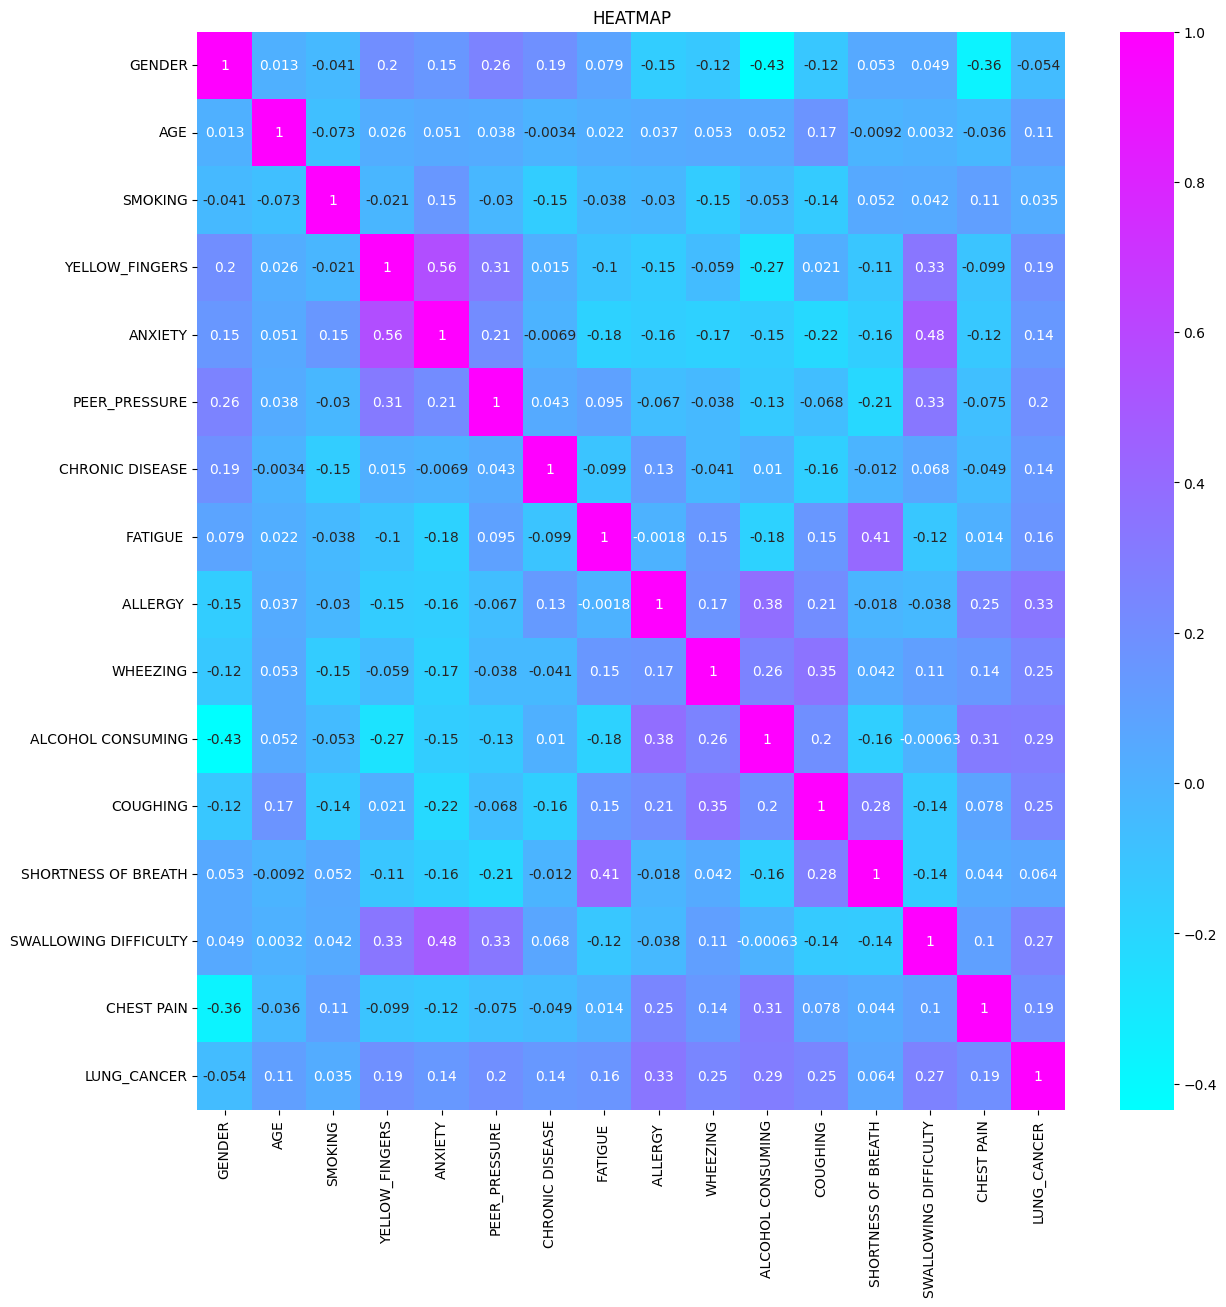

In [65]:
# heat map
f, ax = plt.subplots(1, 1, figsize = (14, 14))
plt.title('HEATMAP')
ax = sns.heatmap(data.corr(), annot = True, cmap = 'cool')

In [66]:
# splitting the features and target (test and train)
x = data.drop(['LUNG_CANCER'], axis = 1)
y = data['LUNG_CANCER']
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.2, random_state = 42)
print('x\t=', x.shape, '\ny\t=', y.shape, '\nx_train\t=', x_train.shape, '\nx_test\t=', x_test.shape)
title = []
cm = []
report = []

x	= (276, 15) 
y	= (276,) 
x_train	= (220, 15) 
x_test	= (56, 15)


In [67]:
# Support Vector Classification
svc = SVC()
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
print(classification_report(y_test, svc_pred))
if 'Support Vector Classification' not in title:
    title.append('Support Vector Classification')
    cm.append(confusion_matrix(y_test, svc_pred))
    report.append(classification_report(y_test, svc_pred, output_dict=True))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.79      1.00      0.88        44

    accuracy                           0.79        56
   macro avg       0.39      0.50      0.44        56
weighted avg       0.62      0.79      0.69        56



In [68]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
print(classification_report(y_test, lr_pred))
if 'Logistic Regression' not in title:
    title.append('Logistic Regression')
    cm.append(confusion_matrix(y_test, lr_pred))
    report.append(classification_report(y_test, lr_pred, output_dict=True))

              precision    recall  f1-score   support

           0       1.00      0.58      0.74        12
           1       0.90      1.00      0.95        44

    accuracy                           0.91        56
   macro avg       0.95      0.79      0.84        56
weighted avg       0.92      0.91      0.90        56



In [69]:
# Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
lda_pred = lda.predict(x_test)
print(classification_report(y_test, lda_pred))
if 'Linear Discriminant Analysis' not in title:
  title.append('Linear Discriminant Analysis')
  cm.append(confusion_matrix(y_test, lda_pred))
  report.append(classification_report(y_test, lda_pred, output_dict=True))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.93      0.98      0.96        44

    accuracy                           0.93        56
   macro avg       0.92      0.86      0.89        56
weighted avg       0.93      0.93      0.93        56



In [70]:
# Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt_pred = dt.predict(x_test)
print(classification_report(y_test, dt_pred))
if 'Decision Tree Classifier' not in title:
  title.append('Decision Tree Classifier')
  cm.append(confusion_matrix(y_test, dt_pred))
  report.append(classification_report(y_test, dt_pred, output_dict=True))

              precision    recall  f1-score   support

           0       1.00      0.58      0.74        12
           1       0.90      1.00      0.95        44

    accuracy                           0.91        56
   macro avg       0.95      0.79      0.84        56
weighted avg       0.92      0.91      0.90        56



In [71]:
# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
print(classification_report(y_test, rf_pred))
if 'Random Forest Classifier' not in title:
  title.append('Random Forest Classifier')
  cm.append(confusion_matrix(y_test, rf_pred))
  report.append(classification_report(y_test, rf_pred, output_dict=True))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50        12
           1       0.85      1.00      0.92        44

    accuracy                           0.86        56
   macro avg       0.92      0.67      0.71        56
weighted avg       0.88      0.86      0.83        56



In [72]:
# Gradient Boosting Classifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
gbc_pred = gbc.predict(x_test)
print(classification_report(y_test, gbc_pred))
if 'Gradient Boosting Classifier' not in title:
  title.append('Gradient Boosting Classifier')
  cm.append(confusion_matrix(y_test, gbc_pred))
  report.append(classification_report(y_test, gbc_pred, output_dict=True))

              precision    recall  f1-score   support

           0       1.00      0.42      0.59        12
           1       0.86      1.00      0.93        44

    accuracy                           0.88        56
   macro avg       0.93      0.71      0.76        56
weighted avg       0.89      0.88      0.85        56



In [73]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
print(classification_report(y_test, knn_pred))
if 'K-Nearest Neighbors' not in title:
  title.append('K-Nearest Neighbors')
  cm.append(confusion_matrix(y_test, knn_pred))
  report.append(classification_report(y_test, knn_pred, output_dict=True))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.79      1.00      0.88        44

    accuracy                           0.79        56
   macro avg       0.39      0.50      0.44        56
weighted avg       0.62      0.79      0.69        56



In [74]:
# Naive Bayes Classifier
nb = GaussianNB()
nb.fit(x_train, y_train)
nb_pred = nb.predict(x_test)
print(classification_report(y_test, nb_pred))
if 'Naive Bayes Classifier' not in title:
  title.append('Naive Bayes Classifier')
  cm.append(confusion_matrix(y_test, nb_pred))
  report.append(classification_report(y_test, nb_pred, output_dict=True))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.91      0.98      0.95        44

    accuracy                           0.91        56
   macro avg       0.90      0.82      0.85        56
weighted avg       0.91      0.91      0.91        56



In [75]:
# Multi-Layer Perceptron Classifier
mlp = MLPClassifier()
mlp.fit(x_train, y_train)
mlp_pred = mlp.predict(x_test)
print(classification_report(y_test, mlp_pred))
if 'Multi-Layer Perceptron Classifier' not in title:
  title.append('Multi-Layer Perceptron Classifier')
  cm.append(confusion_matrix(y_test, mlp_pred))
  report.append(classification_report(y_test, mlp_pred, output_dict=True))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.79      1.00      0.88        44

    accuracy                           0.79        56
   macro avg       0.39      0.50      0.44        56
weighted avg       0.62      0.79      0.69        56



In [76]:
# Bagging Classifier
bc = BaggingClassifier()
bc.fit(x_train, y_train)
bc_pred = bc.predict(x_test)
print(classification_report(y_test, bc_pred))
if 'Bagging Classifier' not in title:
  title.append('Bagging Classifier')
  cm.append(confusion_matrix(y_test, bc_pred))
  report.append(classification_report(y_test, bc_pred, output_dict=True))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67        12
           1       0.88      1.00      0.94        44

    accuracy                           0.89        56
   macro avg       0.94      0.75      0.80        56
weighted avg       0.91      0.89      0.88        56



In [77]:
# Adaptive Boosting
abc = AdaBoostClassifier()
abc.fit(x_train, y_train)
abc_pred = abc.predict(x_test)
print(classification_report(y_test, abc_pred))
if 'Adaptive Boosting' not in title:
  title.append('Adaptive Boosting')
  cm.append(confusion_matrix(y_test, abc_pred))
  report.append(classification_report(y_test, abc_pred, output_dict=True))

              precision    recall  f1-score   support

           0       1.00      0.42      0.59        12
           1       0.86      1.00      0.93        44

    accuracy                           0.88        56
   macro avg       0.93      0.71      0.76        56
weighted avg       0.89      0.88      0.85        56



In [78]:
# Radius Neighbors Classifier
rnc = RadiusNeighborsClassifier(radius = 100)
rnc.fit(x_train, y_train)
rnc_pred = rnc.predict(x_test)
print(classification_report(y_test, rnc_pred))
if 'Radius Neighbors Classifier' not in title:
  title.append('Radius Neighbors Classifier')
  cm.append(confusion_matrix(y_test, rnc_pred))
  report.append(classification_report(y_test, rnc_pred, output_dict=True))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.79      1.00      0.88        44

    accuracy                           0.79        56
   macro avg       0.39      0.50      0.44        56
weighted avg       0.62      0.79      0.69        56



In [79]:
# Extra Trees Classifier
etc = ExtraTreesClassifier()
etc.fit(x_train, y_train)
etc_pred = etc.predict(x_test)
print(classification_report(y_test, etc_pred))
if 'Extra Trees Classifier' not in title:
  title.append('Extra Trees Classifier')
  cm.append(confusion_matrix(y_test, etc_pred))
  report.append(classification_report(y_test, etc_pred, output_dict=True))

              precision    recall  f1-score   support

           0       1.00      0.42      0.59        12
           1       0.86      1.00      0.93        44

    accuracy                           0.88        56
   macro avg       0.93      0.71      0.76        56
weighted avg       0.89      0.88      0.85        56



In [80]:
# Cat Boost Classifier
cbc = CatBoostClassifier()
cbc.fit(x_train, y_train, verbose = False)
cbc_pred = cbc.predict(x_test)
print(classification_report(y_test, cbc_pred))
if 'Cat Boost Classifier' not in title:
  title.append('Cat Boost Classifier')
  cm.append(confusion_matrix(y_test, cbc_pred))
  report.append(classification_report(y_test, cbc_pred, output_dict=True))

              precision    recall  f1-score   support

           0       1.00      0.25      0.40        12
           1       0.83      1.00      0.91        44

    accuracy                           0.84        56
   macro avg       0.92      0.62      0.65        56
weighted avg       0.87      0.84      0.80        56



In [86]:
# LSTM
columns[0], columns[1] = columns[1], columns[0]

label_encoders = {}
X = x
for column in columns[:-1]:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# build the LSTM model
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (1, X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, Y_train, epochs = 50, batch_size = 32, validation_split = 0.2, verbose = 0)
model.evaluate(X_test, Y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9211 - loss: 0.2975 


[0.26284438371658325, 0.9285714030265808]

In [87]:
# Long Short-Term Memory
lstm_pred = model.predict(X_test)
lstm_pred = np.where(lstm_pred > 0.5, 1, 0)
print(classification_report(Y_test, lstm_pred))
if 'Long Short-Term Memory' not in title:
  title.append('Long Short-Term Memory')
  cm.append(confusion_matrix(Y_test, lstm_pred))
  report.append(classification_report(Y_test, lstm_pred, output_dict=True))

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 275ms/step
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.93      0.98      0.96        44

    accuracy                           0.93        56
   macro avg       0.92      0.86      0.89        56
weighted avg       0.93      0.93      0.93        56



In [88]:
# BiLSTM
x_scaled = scaler.fit_transform(x_train)
x_scaled = np.expand_dims(x_scaled, axis=2)

# build the BiLSTM model
modelbi = Sequential()
modelbi.add(Bidirectional(LSTM(64, return_sequences=False), input_shape=(x_scaled.shape[1], x_scaled.shape[2])))
modelbi.add(Dropout(0.2))
modelbi.add(Dense(1, activation='sigmoid'))

modelbi.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
modelbi.fit(x_scaled, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test), verbose = 0)
modelbi.evaluate(x_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7738 - loss: 1.9289


[1.8248618841171265, 0.7857142686843872]

In [89]:
# Bidirectional LSTM
bilstm_pred = modelbi.predict(x_test)
bilstm_pred = np.where(bilstm_pred > 0.5, 1, 0)
print(classification_report(y_test, bilstm_pred))
if 'Bidirectional LSTM' not in title:
  title.append('Bidirectional LSTM')
  cm.append(confusion_matrix(y_test, bilstm_pred))
  report.append(classification_report(y_test, bilstm_pred, output_dict = True))

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 290ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.79      1.00      0.88        44

    accuracy                           0.79        56
   macro avg       0.39      0.50      0.44        56
weighted avg       0.62      0.79      0.69        56



In [91]:
# GAN
def build_generator(input_dim, output_dim):
    model = Sequential([
        Dense(64, input_dim=input_dim),
        LeakyReLU(0.2),
        Dense(32),
        LeakyReLU(0.2),
        Dense(output_dim, activation='sigmoid')
    ])
    return model

def build_discriminator(input_dim):
    model = Sequential([
        Dense(64, input_dim=input_dim),
        LeakyReLU(0.2),
        Dense(32),
        LeakyReLU(0.2),
        Dense(1, activation='sigmoid')
    ])
    return model

def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential([generator, discriminator])
    return model

input_dim = x_train.shape[1]
latent_dim = 16
epochs = 10
batch_size = 32
generator = build_generator(latent_dim, input_dim)
discriminator = build_discriminator(input_dim)
gan = build_gan(generator, discriminator)

discriminator.compile(optimizer=Adam(0.0002, 0.5), loss='binary_crossentropy', metrics=['accuracy'])
gan.compile(optimizer=Adam(0.0002, 0.5), loss='binary_crossentropy')
for epoch in range(epochs):
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    real_samples = x_train.iloc[idx].values
    real_labels = np.ones((batch_size, 1))
    fake_samples = generator.predict(np.random.randn(batch_size, latent_dim), verbose = 0)
    fake_labels = np.zeros((batch_size, 1))

    d_loss_real = discriminator.train_on_batch(real_samples, real_labels)
    d_loss_fake = discriminator.train_on_batch(fake_samples, fake_labels)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    noise = np.random.randn(batch_size, latent_dim)
    valid_labels = np.ones((batch_size, 1))
    g_loss = gan.train_on_batch(noise, valid_labels)

    # if epoch % 10 == 0:
    #     print(f"Epoch {epoch}, D Loss: {d_loss[0]}, G Loss: {g_loss[0]}")


In [92]:
# Generative Adversarial Network
gan_pred = discriminator.predict(x_test)
gan_pred = (gan_pred > 0.5).astype(int)
print(classification_report(y_test, gan_pred))
if 'Generative Adversarial Network' not in title:
  title.append('Generative Adversarial Network')
  cm.append(confusion_matrix(y_test, gan_pred))
  report.append(classification_report(y_test, gan_pred, output_dict = True))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
              precision    recall  f1-score   support

           0       0.21      1.00      0.35        12
           1       0.00      0.00      0.00        44

    accuracy                           0.21        56
   macro avg       0.11      0.50      0.18        56
weighted avg       0.05      0.21      0.08        56



In [139]:
# Voting Classifier
vc = VotingClassifier(estimators=[('lda', lda), ('dt', dt), ('nb', nb), ('lr', lr), ('bc', bc)], voting='hard')  # Change 'hard' to 'soft' if needed
vc.fit(x_train, y_train)
vc_pred = vc.predict(x_test)
print(classification_report(y_test, vc_pred))
# title = title[:-1]
# cm = cm[:-1]
# report = report[:-1]
if 'Voting Classifier' not in title:
  title.append('Voting Classifier')
  cm.append(confusion_matrix(y_test, vc_pred))
  report.append(classification_report(y_test, vc_pred, output_dict = True))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86        12
           1       0.94      1.00      0.97        44

    accuracy                           0.95        56
   macro avg       0.97      0.88      0.91        56
weighted avg       0.95      0.95      0.94        56



In [151]:
# Stacking Classifier
estimators = [
    ('dt', dt),
    ('nb', nb),
    ('lr', lr),
    ('bc', bc)
]
meta_estimator = lda
sc = StackingClassifier(estimators=estimators, final_estimator=meta_estimator)
sc.fit(x_train, y_train)
sc_pred = sc.predict(x_test)
print(classification_report(y_test, sc_pred))
# title = title[:-1]
# cm = cm[:-1]
# report = report[:-1]
if 'Stacking Classifier' not in title:
  title.append('Stacking Classifier')
  cm.append(confusion_matrix(y_test, sc_pred))
  report.append(classification_report(y_test, sc_pred, output_dict = True))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86        12
           1       0.94      1.00      0.97        44

    accuracy                           0.95        56
   macro avg       0.97      0.88      0.91        56
weighted avg       0.95      0.95      0.94        56



In [153]:
i = 17
print(title[i])
print(cm[i])
print(report[i]['accuracy'])

Voting Classifier
[[ 9  3]
 [ 0 44]]
0.9464285714285714


In [187]:
# sorting with accuracy
accuracy = []
for i in range(len(title)):
    accuracy.append(report[i]['accuracy'])

models = pd.DataFrame({
    'Title' : title,
    'Scores' : accuracy})
models.sort_values(by = 'scores', ascending = False)

,title,scores
18,Stacking Classifier,0.946429
17,Voting Classifier,0.946429
2,Linear Discriminant Analysis,0.928571
14,Long Short-Term Memory,0.928571
7,Naive Bayes Classifier,0.910714
3,Decision Tree Classifier,0.910714
1,Logistic Regression,0.910714
9,Bagging Classifier,0.892857
10,Adaptive Boosting,0.875000
12,Extra Trees Classifier,0.875000


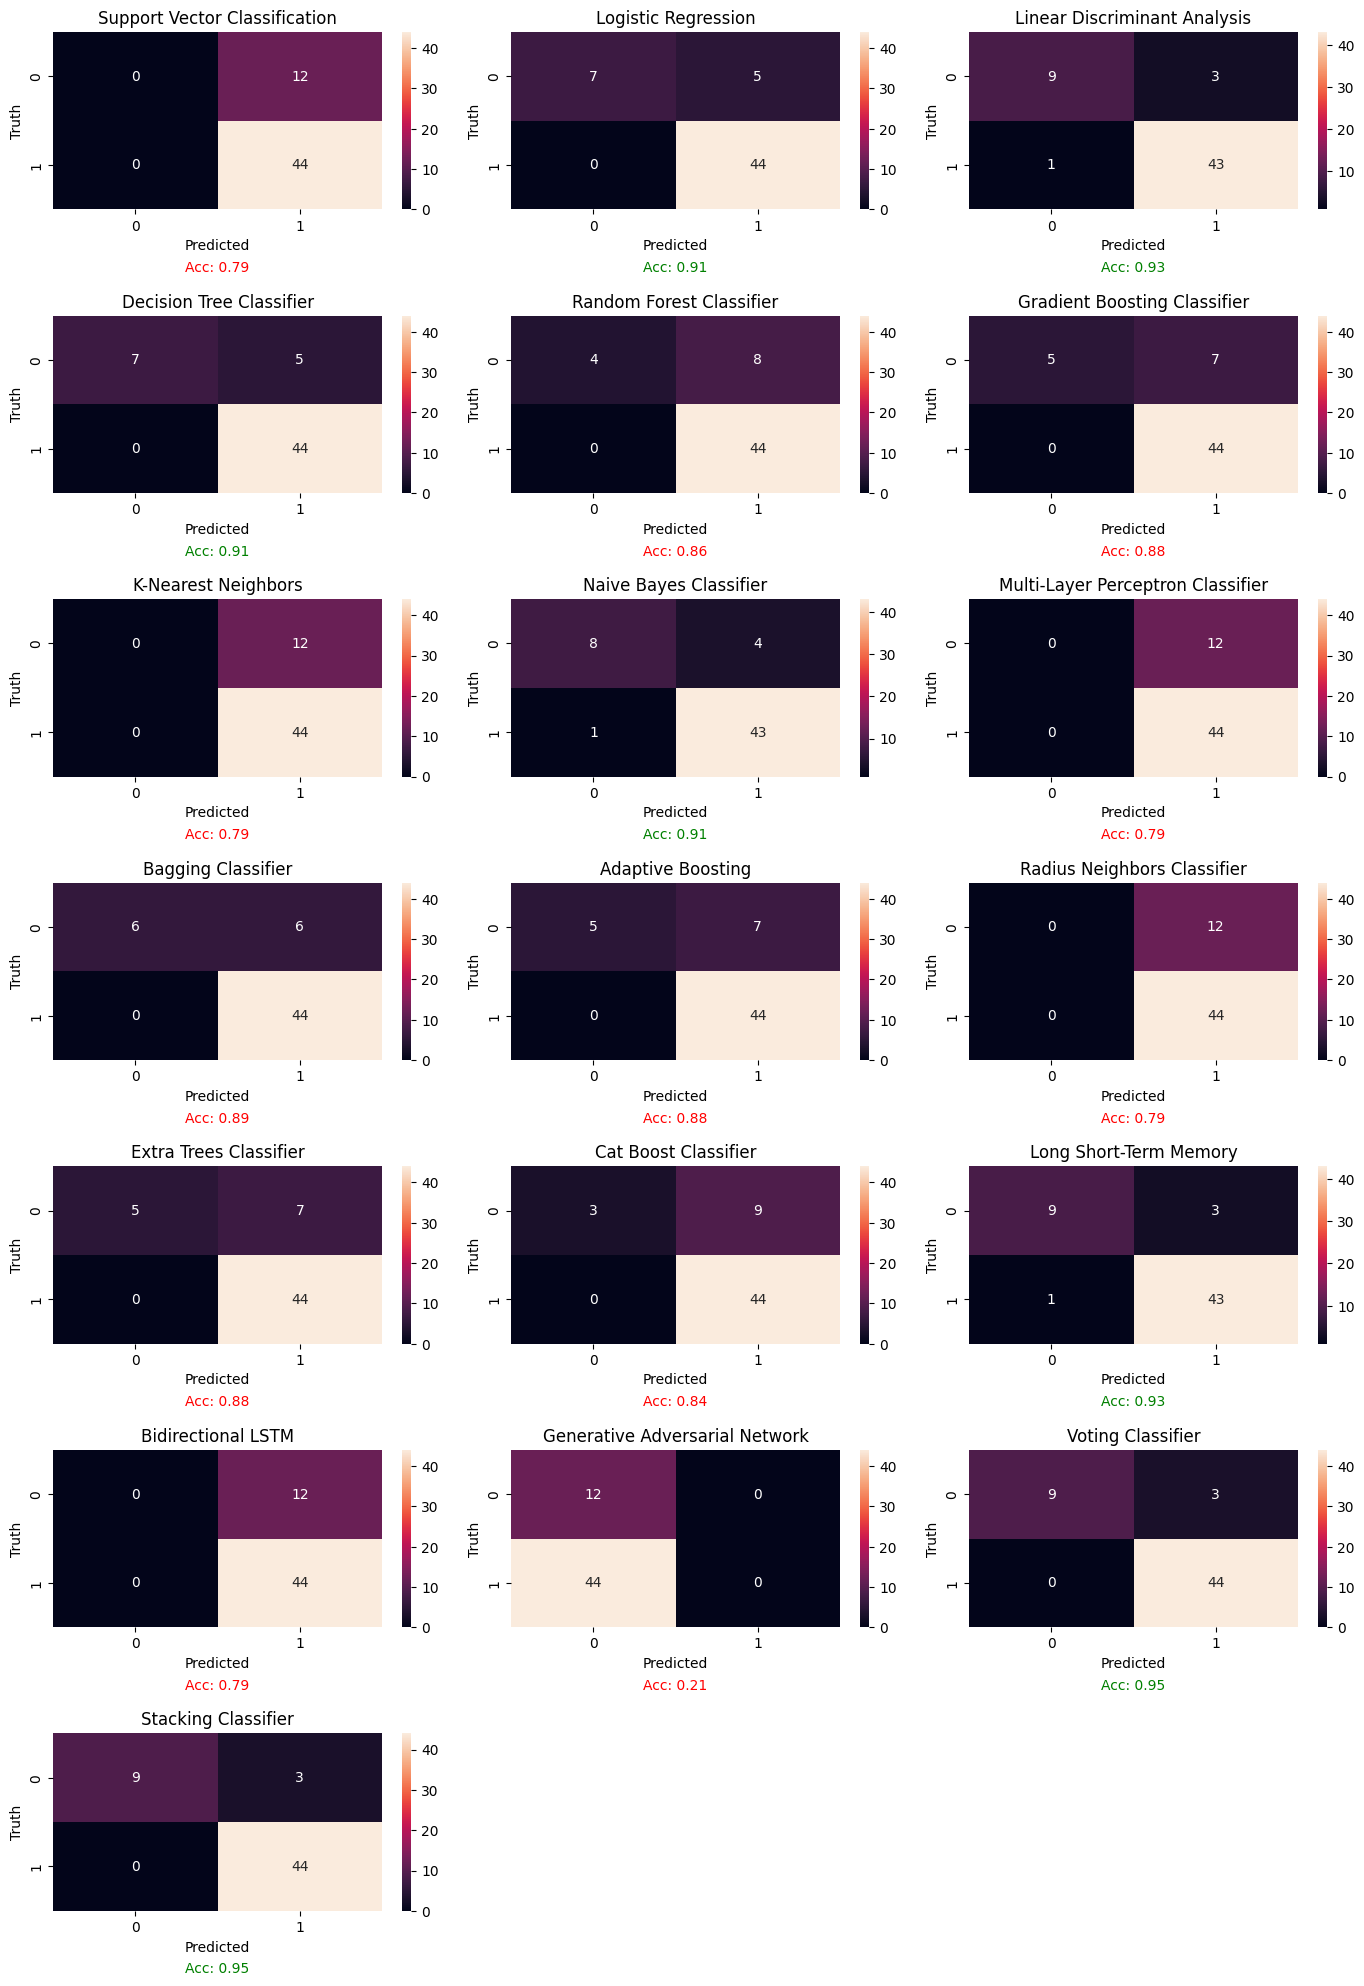

In [171]:
# confusion matrix heatmaps
fig = plt.figure(figsize = (14, 20))
for i in range(len(title)):
    plt.subplot(7, 3, i+1)
    plt.title(title[i])
    sns.heatmap(cm[i], annot = True)
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    a = round(accuracy[i], 2)
    c = 'green' if a>0.9 else 'red'
    plt.text(0.8, 2.7, f"Acc: {a}", fontsize=10, color=c)
plt.tight_layout()

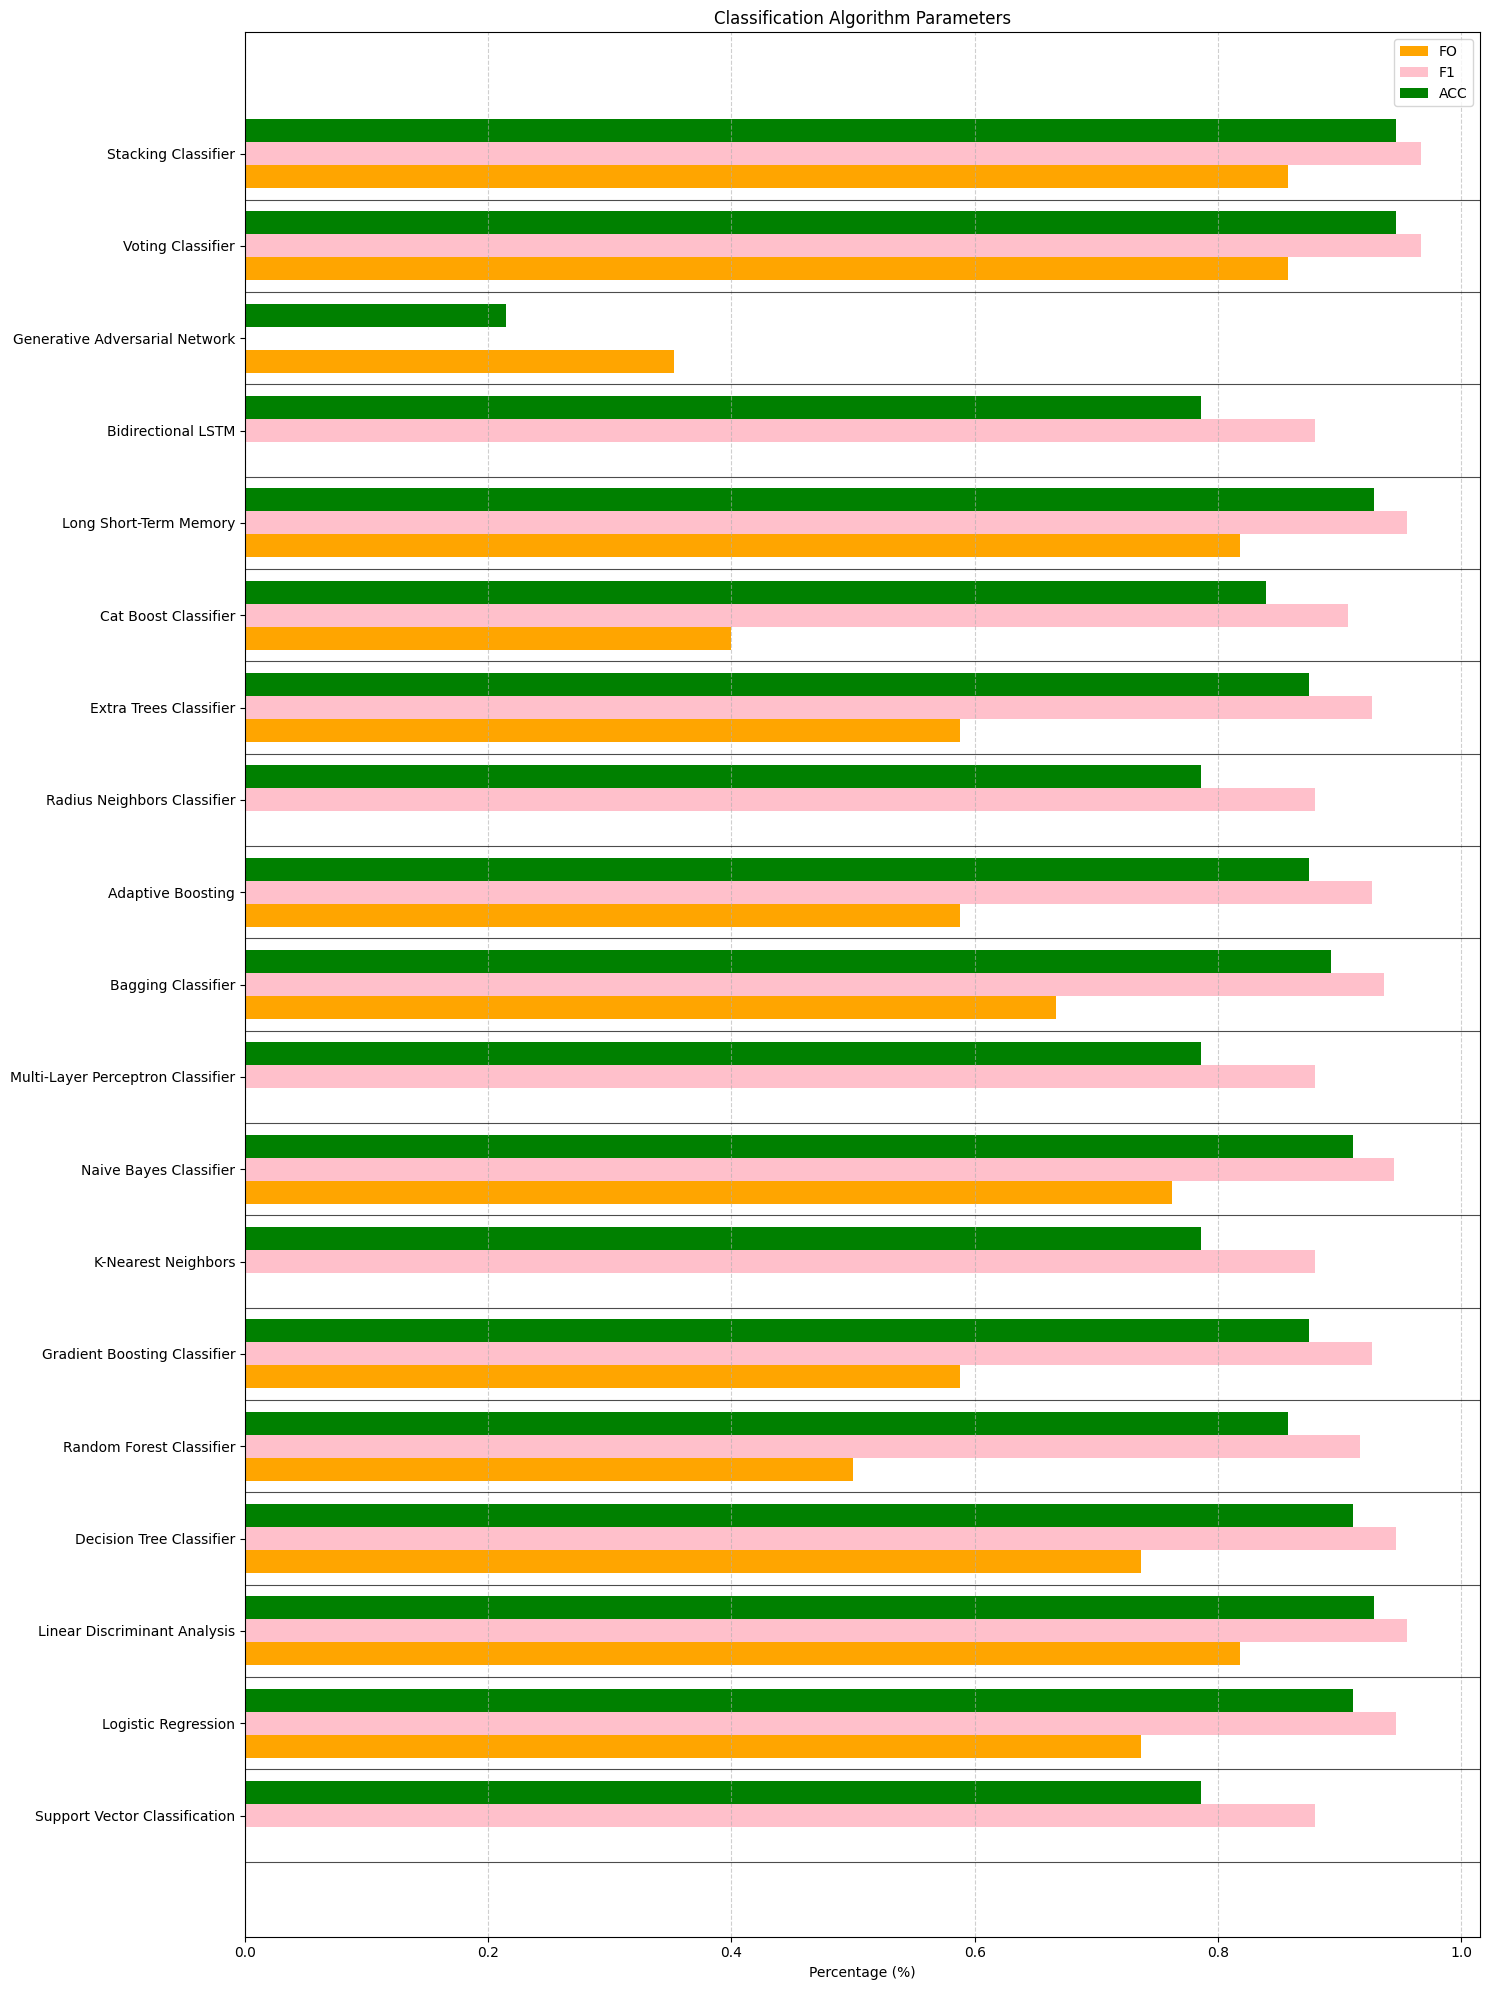

In [196]:
# bar graph to compare
f1Score = []
falseOmission = []
for i in range (len(title)):
  f1Score.append(report[i]['1']['f1-score'])
  falseOmission.append(report[i]['0']['f1-score'])

f1Score = np.array(f1Score)
falseOmission = np.array(falseOmission)
accuracy = np.array(accuracy)

bar_width = 0.25
r1 = np.arange(len(title))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.figure(figsize=(15, 20))
plt.barh(r1, falseOmission, height=bar_width, color='orange', label='FO')
plt.barh(r2, f1Score, height=bar_width, color='pink', label='F1')
plt.barh(r3, accuracy, height=bar_width, color='green', label='ACC')
for i in range(len(title)):
    plt.axhline(y=i-0.25, color='black', linewidth=0.8, alpha=0.7)

plt.yticks([r + bar_width for r in range(len(title))], title)
plt.xlabel("Percentage (%)")
plt.title("Classification Algorithm Parameters")
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
print('Made by:')
print('Name\t\t: Gobinda Panda')
print('Regd. No.\t: 2102040002')
print('Branch\t\t: Computer Science and Engineering')
print('Semester\t: 7th Semester')
print('Year\t\t: 4th Year')
print('Course\t\t: B.Tech')
print('College\t\t: Veer Surendra Sai University of Technology')
print('Phone\t\t: +91 6371299811')
print('E-mail\t\t: pandagobinda7@gmail.com')

In [ ]:
print('Made by:')
print('Name\t\t: Sugyani Manjari Dash')
print('Regd. No.\t: 2102081031')
print('Branch\t\t: Information Technology')
print('Semester\t: 7th Semester')
print('Year\t\t: 4th Year')
print('Course\t\t: B.Tech')
print('College\t\t: Veer Surendra Sai University of Technology')
print('Phone\t\t: +91 7978377811')
print('E-mail\t\t: manjaridashsugyani305@gmail.com')